# Data

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#for debug/clear print
def cp(value, value_name):
    print('==============%s=============='%value_name)
    print(value)    
    print('==============%s=============='%value_name)
    
def fplot(vec, name, show_num):
    plt.plot(vec[:show_num],'o')
    plt.title(name)
    plt.show()
 
hpi = pd.read_csv('hpi_data.csv')
mortgage = pd.read_csv('mortgage data.csv')
rate = pd.read_csv('rate.csv')

In [225]:
hpi

,year,quarter,state,state_code,state_full,HPI_state
0,1975,1,AK,2,Alaska,61.580002
1,1975,2,AK,2,Alaska,63.060001
2,1975,3,AK,2,Alaska,67.699997
3,1975,4,AK,2,Alaska,66.779999
4,1976,1,AK,2,Alaska,73.070000
...,...,...,...,...,...,...
8971,2017,4,WY,56,Wyoming,309.510010
8972,2018,1,WY,56,Wyoming,315.810000
8973,2018,2,WY,56,Wyoming,316.209990
8974,2018,3,WY,56,Wyoming,320.450010


In [226]:
mortgage

,source,loan_id,Year_orig,Quarter_orig,delinquent30,frst_dte,orig_rt,orig_amt,oltv,ocltv,dti,cscore_b,mi_pct,fthb_flg,num_bo,num_unit,state
0,FD,F100Q1023070,2000,1,0,4/1/2000,8.500,204000,79,79,37,643,0,N,2,1,AK
1,FD,F100Q1039162,2000,1,0,5/1/2000,8.375,100000,34,34,19,796,0,N,2,1,AK
2,FD,F100Q1050054,2000,1,0,3/1/2000,8.500,173000,95,95,43,698,25,N,2,1,AK
3,FD,F100Q1002153,2000,1,0,3/1/2000,8.125,137000,80,80,28,716,0,N,2,1,AL
4,FD,F100Q1005553,2000,1,0,3/1/2000,8.250,92000,95,95,42,680,30,N,2,1,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295832,FN,6.11e+11,2006,4,1,1/1/2007,6.250,123000,72,72,26,639,0,N,2,1,WY
295833,FN,6.61e+11,2006,4,0,12/1/2006,6.000,150000,64,64,45,720,0,Y,2,1,WY
295834,FN,6.65e+11,2006,4,1,2/1/2007,6.625,147000,80,90,52,691,0,N,1,1,WY
295835,FN,7.69e+11,2006,4,0,12/1/2006,6.250,176000,60,60,13,781,0,N,2,1,WY


In [227]:
rate

,year,month,FRM30_rate,treasury_3mon_rate
0,2000,1,8.2100,5.32
1,2000,2,8.3250,5.55
2,2000,3,8.2400,5.69
3,2000,4,8.1525,5.66
4,2000,5,8.5150,5.79
...,...,...,...,...
226,2018,11,4.8660,2.33
227,2018,12,4.6375,2.37
228,2019,1,4.4640,2.37
229,2019,2,4.3700,2.39


In [ ]:
record = []
for i in range(len(mortgage)):
    for j in range(len(rate)):
        mortgage['Year_orig'][i]
        mortgage['Quarter_orig'][i]

## Description of y

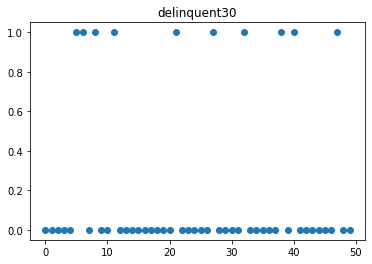

count    295837.000000
mean          0.118237
std           0.322890
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: delinquent30, dtype: float64

In [228]:
fplot(mortgage['delinquent30'], 'delinquent30',50)
mortgage['delinquent30'].describe()

## Shuffle

In [229]:
from sklearn.utils import shuffle
mortgage = shuffle(mortgage, random_state = 34)
x = mortgage
y = mortgage['delinquent30'].values
x = x.drop(labels=['loan_id',"Year_orig",'delinquent30','frst_dte','state'],axis=1)


## Dummy var

In [230]:
x=pd.get_dummies(x)
columns_names = x.columns.values.tolist()
x

,Quarter_orig,orig_rt,orig_amt,oltv,ocltv,dti,cscore_b,mi_pct,num_bo,num_unit,source_FD,source_FN,fthb_flg_N,fthb_flg_U,fthb_flg_Y
92833,2,5.125,138000,95,95,41,766,30,2,1,1,0,1,0,0
224392,4,6.250,171000,95,95,49,702,30,1,1,0,1,1,0,0
201894,1,6.625,95000,54,54,51,766,0,1,1,0,1,0,0,1
100427,4,5.875,198000,80,80,41,637,0,1,1,1,0,1,0,0
171707,1,8.250,40000,67,67,20,578,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,2,7.500,212000,90,90,45,693,25,2,1,1,0,1,0,0
38435,3,7.000,125000,90,90,41,728,17,2,1,1,0,1,0,0
199765,4,6.500,134000,94,94,38,741,25,2,1,0,1,0,0,1
225014,4,5.750,280000,80,95,25,698,0,2,1,0,1,1,0,0


## Scaler of x

In [231]:
#minmaxscaler
mm_x= MinMaxScaler()
x = mm_x.fit_transform(x)
x

array([[0.33333333, 0.27512887, 0.17615894, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.42010309, 0.21986755, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.46842784, 0.1192053 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.45231959, 0.17086093, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.3556701 , 0.36423841, ..., 1.        , 0.        ,
        0.        ],
       [0.66666667, 0.67783505, 0.12582781, ..., 1.        , 0.        ,
        0.        ]])

## train_test_split

In [232]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.33,
                                                   random_state = 0)
print('test number:',len(x_test))

test number: 97627


## Down sample

In [233]:
sample_num = sum(y_train)
idx_list = np.argsort(-y_train)[:2*sample_num]
idx_list = list(idx_list)

y_train_sample = y_train[idx_list]
x_train_sample = x_train[idx_list]
y_train_sample = shuffle(y_train_sample, random_state = 34)
x_train_sample = shuffle(x_train_sample, random_state = 34)

# Model

In [246]:
model=LogisticRegression()
model.fit(x_train, y_train)

c:\users\lenovo\miniconda3\envs\tf17\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

# (a)  important default indicators

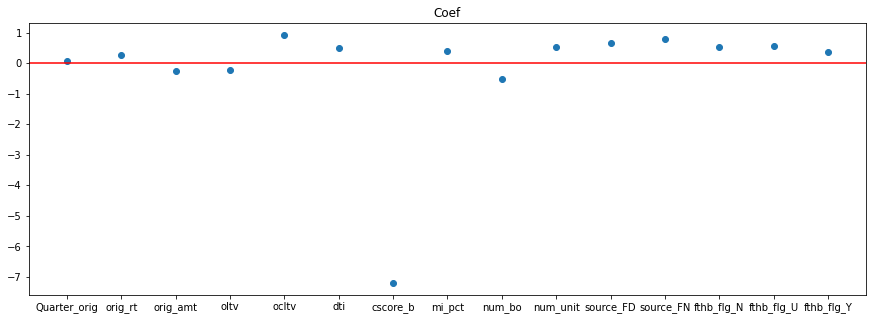

The coefficients of features accessed by logistic regression can explain the importance of each feature.
Importance of features:(from the most important to the least)
The feature above Red line affect the delinquent behavior positively
And feature below Red line affect the delinquent behavior negatively
cscore_b
ocltv
source_FN
source_FD
fthb_flg_U
num_unit
fthb_flg_N
num_bo
dti
mi_pct
fthb_flg_Y
orig_rt
orig_amt
oltv
Quarter_orig


In [247]:
plt.figure(figsize=(15,5))
plt.plot(columns_names, model.coef_[0,:], 'o')
plt.axhline(y=0,c='r')
plt.title('Coef')
plt.show()

print('The coefficients of features accessed by logistic regression can explain the importance of each feature.')
print('Importance of features:(from the most important to the least)')
print('The feature above Red line affect the delinquent behavior positively')
print('And feature below Red line affect the delinquent behavior negatively')
print('=============================================')
rank = list((-abs(model.coef_[0,:])).argsort())
for i in rank:
    print(columns_names[i])

# (b) Result in test set

Train:
              precision    recall  f1-score   support

           0     0.8833    0.9972    0.9368    174755
           1     0.4602    0.0180    0.0346     23455

    accuracy                         0.8813    198210
   macro avg     0.6717    0.5076    0.4857    198210
weighted avg     0.8332    0.8813    0.8300    198210

[[174260    495]
 [ 23033    422]]


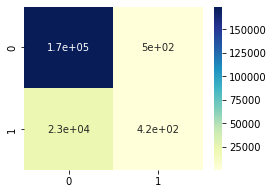

Test:
              precision    recall  f1-score   support

           0     0.8838    0.9974    0.9371     86103
           1     0.5033    0.0199    0.0382     11524

    accuracy                         0.8820     97627
   macro avg     0.6935    0.5086    0.4877     97627
weighted avg     0.8389    0.8820    0.8310     97627

[[85877   226]
 [11295   229]]


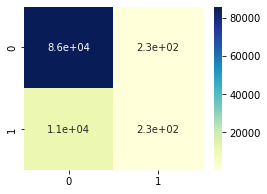

In [240]:
from sklearn import metrics
import seaborn as sns

def myResult(y_train, predict_target, y_test, predict_target2):
    print("Train:")
    print(metrics.classification_report(y_train,predict_target, digits=4))
    cm = metrics.confusion_matrix(y_train,predict_target)
    print(cm)
    plt.figure(figsize=(4,3))
    sns.heatmap(pd.DataFrame(cm),annot=True,cmap="YlGnBu")
    plt.show()
#     plt.plot(y_train[20:50]) 
#     plt.plot(predict_target[20:50],'o')
#     plt.legend(('y_train','y_predict'))
#     plt.title('train')
#     plt.show()

    print("Test:")
    print(metrics.classification_report(y_test,predict_target2, digits=4))
    cm = metrics.confusion_matrix(y_test,predict_target2)
    print(cm)
    plt.figure(figsize=(4,3))
    sns.heatmap(pd.DataFrame(cm),annot=True,cmap="YlGnBu")
    plt.show()    
#     plt.plot(y_test[20:50]) 
#     plt.plot(predict_target2[20:50],'o')
#     plt.legend(('y_test','y_predict'))
#     plt.title('test')
#     plt.show()

y_train_predict=model.predict(x_train)
y_test_predict=model.predict(x_test)
myResult(y_train, y_train_predict, y_test, y_test_predict)

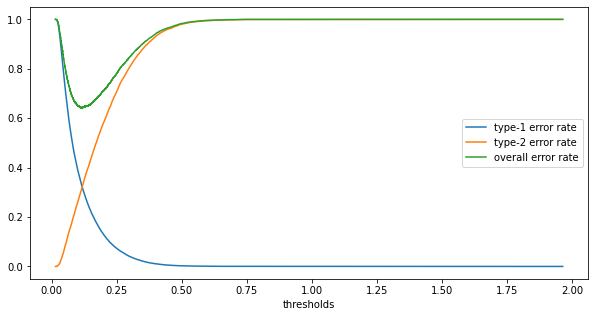

In [241]:
y_test_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba)
fnr = 1-tpr
overall_error = fpr+fnr
plt.figure(figsize=(10, 5))
plt.plot(thresholds, fpr)
plt.plot(thresholds, fnr)
plt.plot(thresholds, overall_error)
plt.legend(('type-1 error rate','type-2 error rate','overall error rate'))
plt.xlabel('thresholds')
plt.show()

# (c) KNN result
KNN doesn't have a good interpretability as logistic regression, so it's hard to say which feature is more important depends on KNN's result.

In [242]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Train:
              precision    recall  f1-score   support

           0     0.9158    0.9824    0.9479    174755
           1     0.7131    0.3268    0.4482     23455

    accuracy                         0.9048    198210
   macro avg     0.8144    0.6546    0.6980    198210
weighted avg     0.8918    0.9048    0.8888    198210

[[171672   3083]
 [ 15791   7664]]


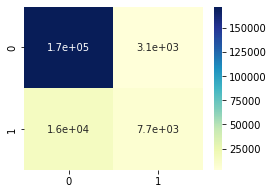

Test:
              precision    recall  f1-score   support

           0     0.8894    0.9553    0.9212     86103
           1     0.2520    0.1125    0.1555     11524

    accuracy                         0.8558     97627
   macro avg     0.5707    0.5339    0.5384     97627
weighted avg     0.8142    0.8558    0.8308     97627

[[82257  3846]
 [10228  1296]]


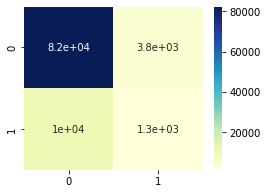

In [245]:
y_train_predict=model.predict(x_train)
y_test_predict=model.predict(x_test)
myResult(y_train, y_train_predict, y_test, y_test_predict)

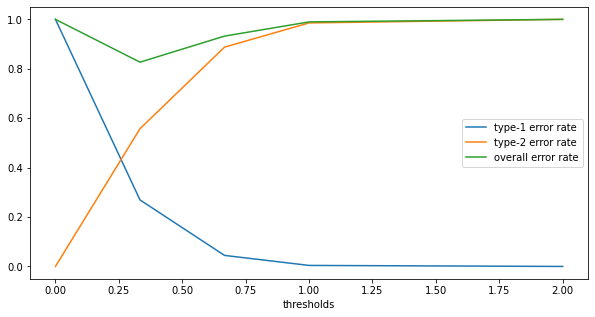

In [244]:
y_test_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba)
fnr = 1-tpr
overall_error = fpr+fnr
plt.figure(figsize=(10, 5))
plt.plot(thresholds, fpr)
plt.plot(thresholds, fnr)
plt.plot(thresholds, overall_error)
plt.legend(('type-1 error rate','type-2 error rate','overall error rate'))
plt.xlabel('thresholds')
plt.show()